In [111]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings('ignore')

# Fashion Mnist

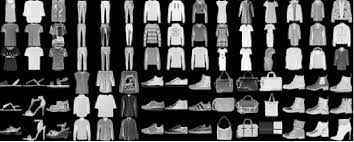

Let's upload the training data

In [112]:
address1 = r'/Users/nnussbaum/Ariel/Fashion/fashion-mnist_train.csv'
train=pd.read_csv(address1)
train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [19]:
print(train.info())
print(format(train.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
(60000, 785)


As we can see, there are 60,000 images in the training data, sized 28x28, as well as a title row

Let's upload the testing data

In [20]:
address2 = r'/Users/nnussbaum/Ariel/Fashion/fashion-mnist_test.csv'
test=pd.read_csv(address2)
test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [21]:
print(test.info())
print(format(test.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None
(10000, 785)


### The different labels for this data are:
1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

In [22]:
y=train['label']
x=train.drop("label",axis=1)

The images are sized 28x28, meaning they have 784 dimensions.
In order to process the data, let's reduce the number of dimensions we have and get rid of the title row.
We will use PCA to do this:

In [23]:
pca=PCA(n_components=16)
train_dataset = pca.fit_transform(x)

Let's define the data into training and testing sets

In [24]:
x_train, x_test, y_train, y_test = train_test_split(train_dataset, y, test_size=0.2, random_state=0)

This is the original size of the images

In [25]:
x_original=pca.inverse_transform(train_dataset)
x_original.shape

(60000, 784)

Let's take a look at some images (in their original form, before reducing the dimensions):

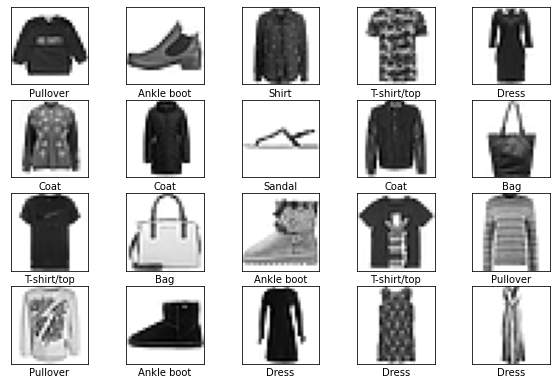

In [26]:
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
target = train[['label']].iloc[:, :]

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(label[target.label.iloc[i]])
    plt.imshow(np.array(train.drop(['label'],axis=1).iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)

plt.show()

Let's take a look at some images after the dimension reduction:

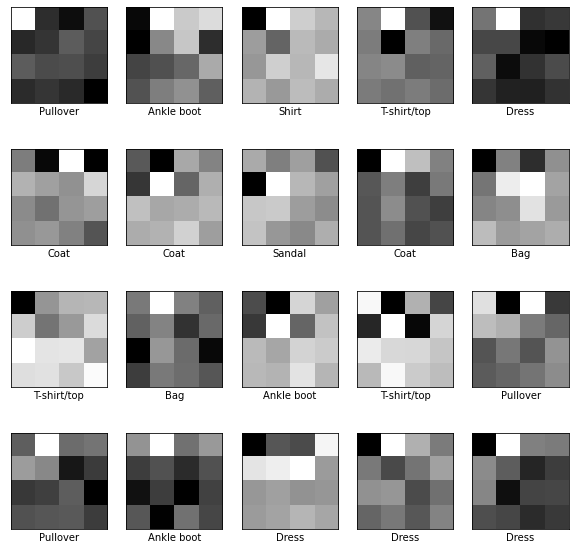

In [27]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(label[target.label.iloc[i]])
    plt.imshow(x_train[i].reshape(4,4), cmap="gist_yarg")
        
plt.show()

Let's see the variance of the labels in the data:

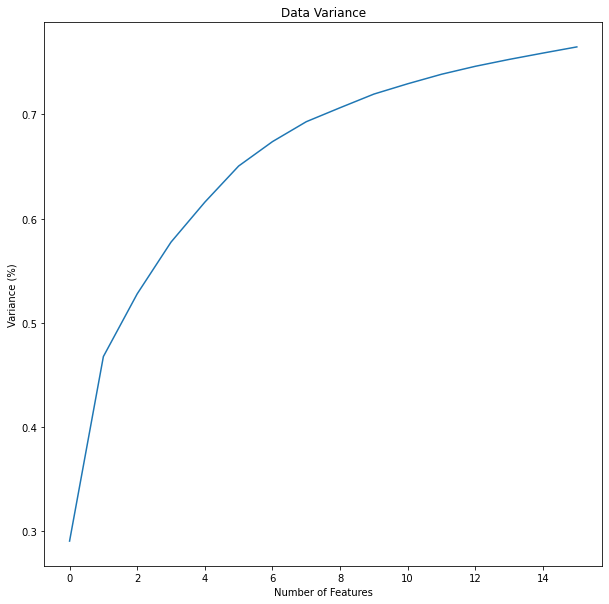

In [28]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title('Data Variance')
plt.show()

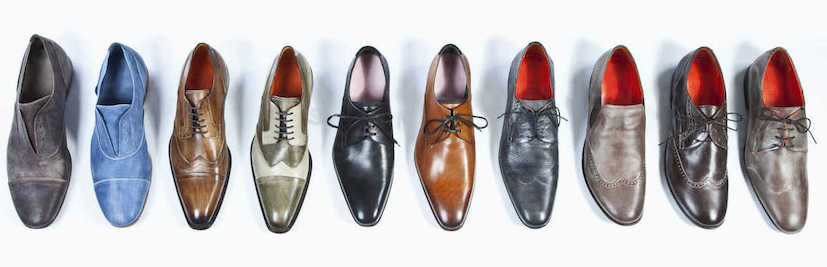

# Let's analyze the data using models:

Let's remember what the confusion matrix shows us:

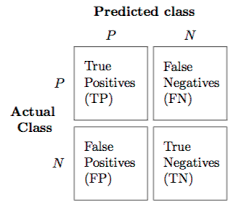

### Pipeline

In [71]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(x_train, y_train)
prediction = pipe.predict(x_test)
ppl_a=accuracy_score(prediction,y_test)
print(ppl_a)

0.8626666666666667


Confusion matrix:

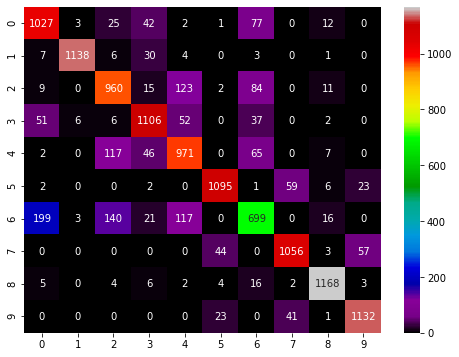

In [72]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, cmap = "nipy_spectral" ,annot=True, fmt='g')

### Logistic Regression

In [106]:
logreg = LogisticRegression(max_iter=150)
logreg.fit(x_train, y_train)
prediction = logreg.predict(x_test)
log_a = accuracy_score(prediction, y_test)
print(log_a)

0.7913333333333333


Confusion matrix:

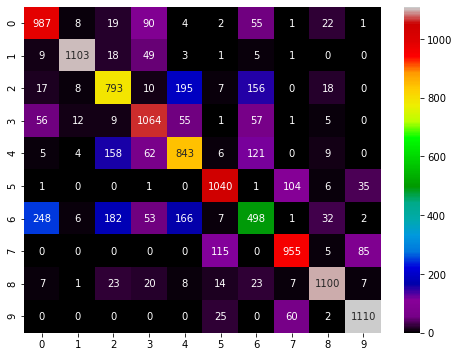

In [74]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, cmap = "nipy_spectral" ,annot=True, fmt='g')

### K Nearest Neighbors

In [75]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
knn_a=accuracy_score(y_test, prediction)
print(knn_a)

0.8415833333333333


Confusion matrix:

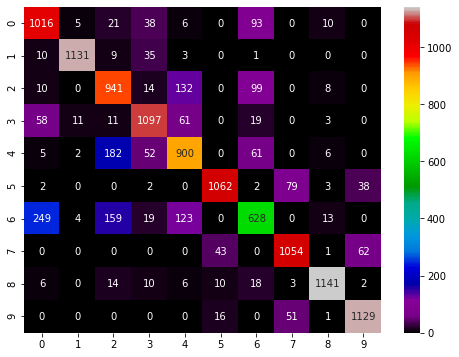

In [76]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, cmap = "nipy_spectral" ,annot=True, fmt='g')

## Ensemble Learning models

### Random Forest Classifier

In [77]:
RForest = RandomForestClassifier()
RForest.fit(x_train, y_train)
prediction = RForest.predict(x_test)
rfc_a=accuracy_score(prediction,y_test)
print(rfc_a)

0.8539166666666667


Confusion matrix:

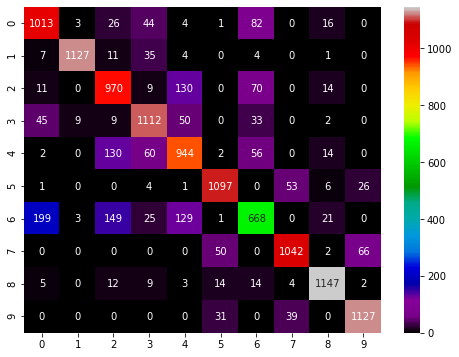

In [78]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, cmap = "nipy_spectral" ,annot=True, fmt='g')

### AdaBoost Classifier

In [79]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(x_train,y_train)
prediction = ada.predict(x_test)
ada_a = accuracy_score(y_test, prediction)
print(ada_a)

0.45916666666666667


Confusion matrix:

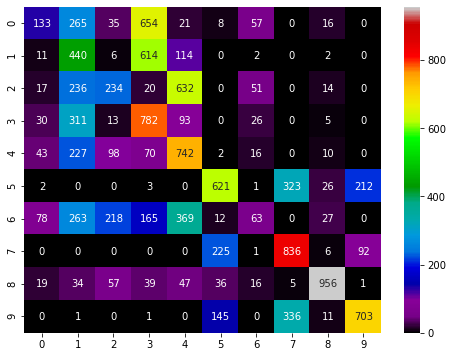

In [80]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, cmap = "nipy_spectral" ,annot=True, fmt='g')

### XGB Classifier

In [88]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train,y_train)
prediction = xgb.predict(x_test)
xgb_a = accuracy_score(y_test, prediction)
print(xgb_a)

0.85475


Confusion matrix:

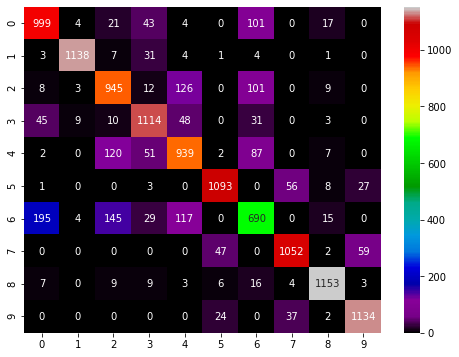

In [89]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, cmap = "nipy_spectral" ,annot=True, fmt='g')

### GradientBoostingClassifier

In [90]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(x_train,y_train)
prediction = gbc.predict(x_test)
gbc_a = accuracy_score(y_test, prediction)
print(gbc_a)

0.614


Confusion matrix:

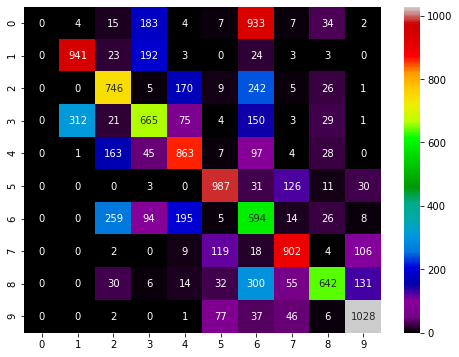

In [91]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, cmap = "nipy_spectral" ,annot=True, fmt='g')

Let's call the models we will use in the next ensemble learning models:

In [43]:
r1 = logreg
r2 = dtree
r3 = KNeighborsClassifier()
r4 = AdaBoostClassifier()
r5 = GradientBoostingClassifier()
r6 = RandomForestClassifier(n_estimators=10, random_state=42)
r7 = make_pipeline(StandardScaler(),LinearSVC(random_state=1, tol=1e-5))

### Voting Classifier

In [107]:
vr = VotingClassifier([('lr', logreg), ('dt', dtree),('knn', knn), ('rfc',RForest)])
vr.fit(x_train,y_train)
prediction = vr.predict(x_test)
vr_a = accuracy_score(y_test, prediction)
print(vr_a)

0.8383333333333334


Confusion matrix:

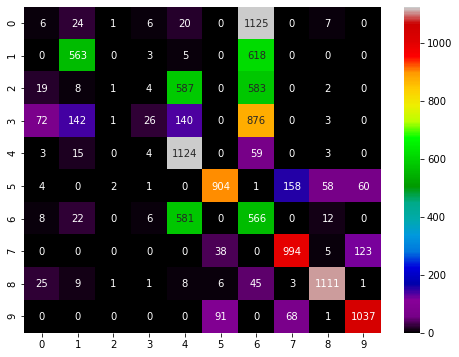

In [103]:
con_mat = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(con_mat, cmap = "nipy_spectral" ,annot=True, fmt='g')

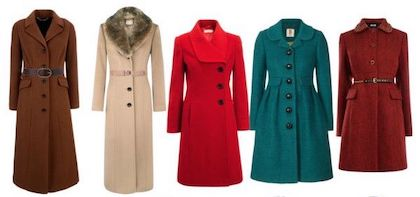

In summary:

## Model accuracy results comparison

In [100]:
data = [[rfc_a*100, ppl_a*100, log_a*100, knn_a*100, ada_a*100, xgb_a*100, gbc_a*100, vr_a*100] ]
models=['Random Forest', 'Pipeline','Logistic Regression','KNN', 'AdaBoost', 'XGB' , 'Gradient Boosting','Voting']
pd.DataFrame(data, columns = models , index=["Accuracy Score (%)"])

,Random Forest,Pipeline,Logistic Regression,KNN,AdaBoost,XGB,Gradient Boosting,Voting
Accuracy Score (%),85.391667,86.266667,79.108333,84.158333,45.916667,85.475,61.4,83.9


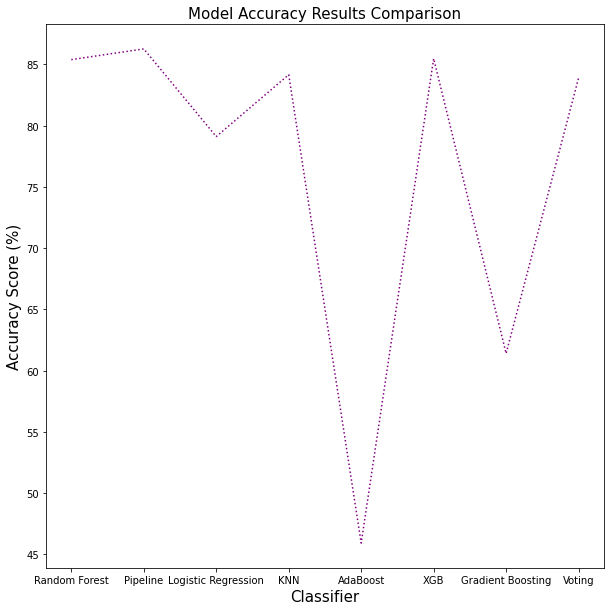

<Figure size 432x288 with 0 Axes>

In [101]:
models=['Random Forest', 'Pipeline','Logistic Regression','KNN', 'AdaBoost', 'XGB' , 'Gradient Boosting','Voting']
data = [rfc_a*100, ppl_a*100, log_a*100, knn_a*100, ada_a*100, xgb_a*100, gbc_a*100, vr_a*100] 
plt.figure(figsize=(10,10))
plt.plot (models, data, linestyle=':',color='purple')
plt.title("Model Accuracy Results Comparison", fontsize = 15)
plt.xlabel("Classifier", fontsize=15)
plt.ylabel("Accuracy Score (%)", fontsize = 15)
plt.figure( facecolor='w', edgecolor='k')
plt.show()

### The best result we've achieved was 86% accuracy, using the Pipeline model

The end.